In [1]:
from simple_nodes_embedding.embedding import GraphCSR, Systems, SysLeft, SystemRight
from matplotlib.pyplot import figure
import networkx as net
import numpy as np

np.random.seed(19680801)

# This notebook provides evaluation of the algorithm on the Zachary's karate club dataset

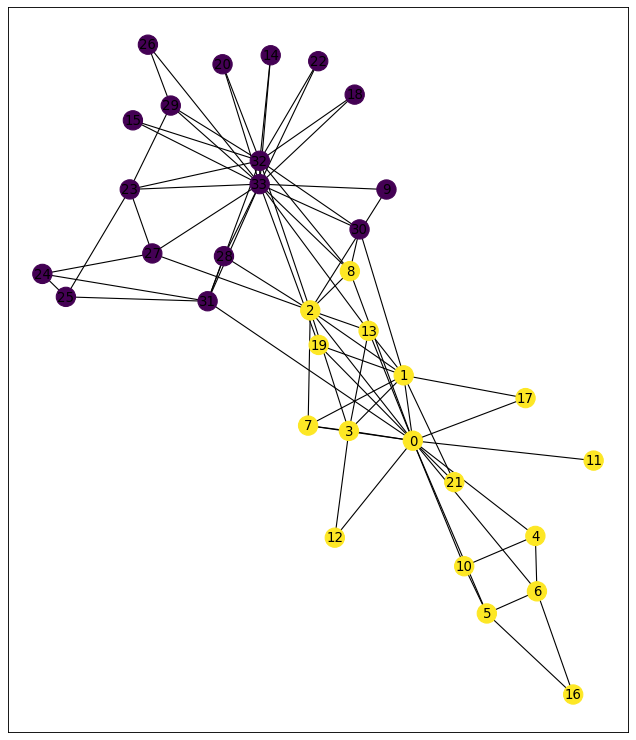

In [2]:
g = net.karate_club_graph()

figure(num=None, figsize=(10, 12), dpi=80)
pos = net.layout.fruchterman_reingold_layout(g)
net.draw_networkx(
    g,
    pos,
    node_color=[0 if g.nodes[n]["club"] == "Officer" else 1 for n in g.nodes], 
)
# Original sub-communities graph

In [3]:
# Transposing resulting embeddings can sometimes yield better results.
# Transposing in this case basically means that every individual dimension j of node i embedding 
#    is carrying information of how signal is transmitted from the node i to the node j, rather than 
#    how string signal of node j is when it reaches node i.

embeddings = Systems(
    system=SysLeft(GraphCSR(g), 0.9),
    make_system_right=lambda n: SystemRight(GraphCSR(g), n),
    n_nodes=g.number_of_nodes(),
).results().T

# normalize values
for i in range(embeddings.shape[1]):
    embeddings[:, i] /= embeddings[:, i].max()

    
# for i in range(embeddings.shape[0]):
#     embeddings[i] /= embeddings[i].max()


/home/vhhl/programs/anaconda3/envs/simple-graph-embedding/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
clustering = kmeans.fit(embeddings).labels_

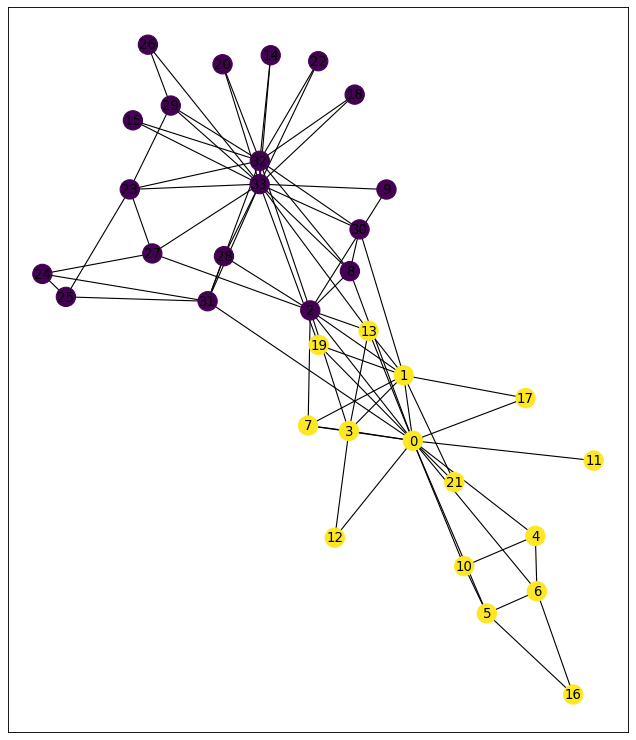

In [5]:
figure(num=None, figsize=(10, 12), dpi=80)
net.draw_networkx(
    g,
    pos,
    node_color=clustering, 
)

# Predicted clustering based on the generated embeddings

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(embeddings)

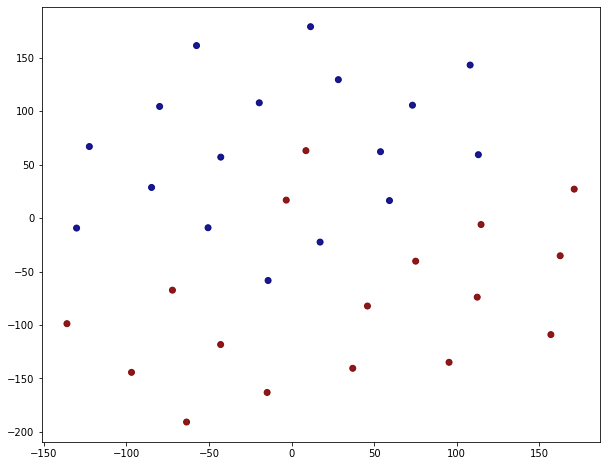

In [7]:
import matplotlib.pyplot as plt

node2group = [0 if g.nodes[n]['club'] == 'Officer' else 1 for n in range(g.number_of_nodes()) ]
plt.figure(figsize=(10, 8))
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node2group,
    cmap="jet",
    alpha=0.9,
)

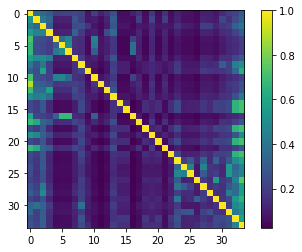

In [8]:
plt.imshow(embeddings)
plt.colorbar()
plt.show()

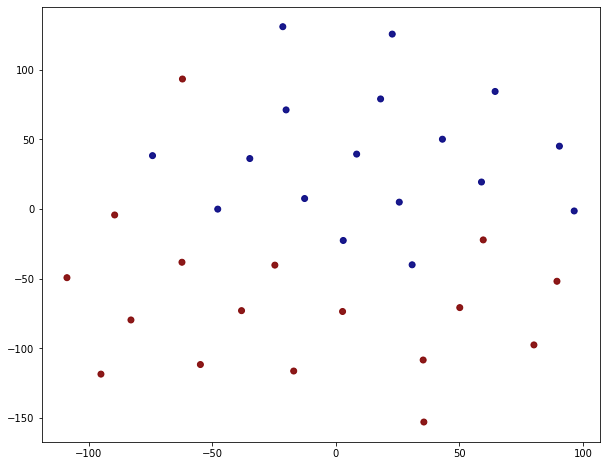

In [9]:
import matplotlib.pyplot as plt

# Double transposed (original) embeddings visualization 
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(embeddings.T)
node2group = [0 if g.nodes[n]['club'] == 'Officer' else 1 for n in range(g.number_of_nodes()) ]
plt.figure(figsize=(10, 8))
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node2group,
    cmap="jet",
    alpha=0.9,
)